## Q4_Ans_Implement Convolutional Neural Network using any suitable dataset

## Q5_Ans_Apply different parameter running methodologies on CNN and analysis their performance

### MNIST

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()#split dataset into train and test
X_train.shape,X_test.shape,y_train.shape,y_test.shape 
#check the shape of train and test dataset which is 
#60000:number of samples in the set
#28:height of each image.
#28:width of each image.

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### DATA SCALING
<p>Data scaling is used to reduce computation time as the neural network works easier with the values that don't vary a lot in scale like range in 0 to 1 or -1 to 1 in every input/features

In [3]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [4]:
#scaled_value = (original_value – min) / (max – min)
X_train = (X_train - 0) / (255 - 0)
X_test = (X_test - 0) / (255 - 0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

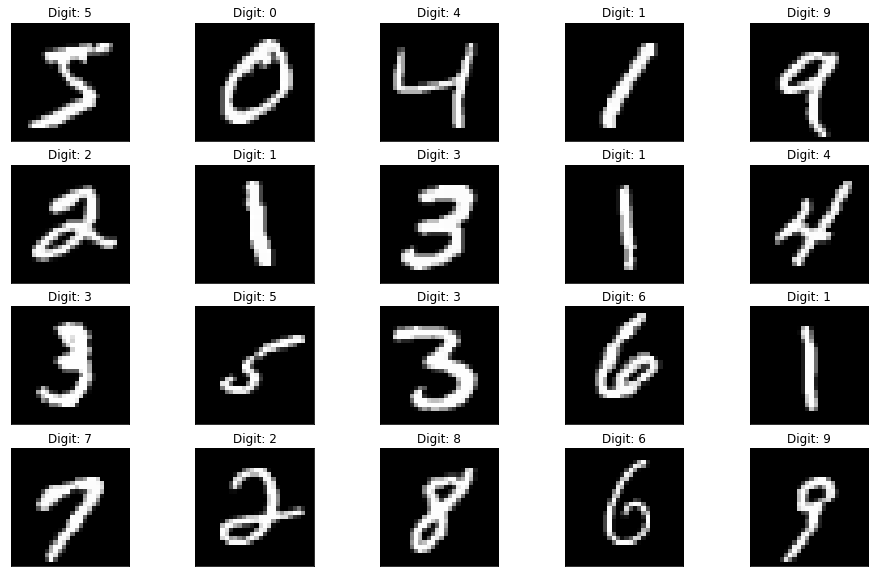

In [5]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
#reshape() function to reshape all of the data by adding that extra dimension.
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
X_train.shape

(60000, 28, 28, 1)

***This is important because it determines which loss function we should use to optimize our neural network.
We have two options:***

<li>Use <b>integers</b> for our target values (as they are now), and make sure we use the <b>"Sparse Categorical Cross-Entropy"</b> loss function.</li>
<li><b>One-hot encode(float dtype)</b> the targets and use the <b>"Categorical Cross-Entropy"</b> loss function.

In [8]:
#let's take a look at the format of our target values (y_train)
y_train[0:20]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

### Define Model

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

### Compile 

In [10]:
model.compile(
    optimizer='sgd', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

### Fit the model

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]
history=model.fit(X_train, y_train,epochs=20,batch_size=32,validation_split=0.2,callbacks=callbacks)

Epoch 1/20
1500/1500 [==============================] - 62s 39ms/step - loss: 0.5422 - accuracy: 0.8563 - val_loss: 0.2605 - val_accuracy: 0.9209
Epoch 2/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2385 - accuracy: 0.9286 - val_loss: 0.1922 - val_accuracy: 0.9442
Epoch 3/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.1849 - accuracy: 0.9451 - val_loss: 0.1853 - val_accuracy: 0.9452
Epoch 4/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.1532 - accuracy: 0.9546 - val_loss: 0.1504 - val_accuracy: 0.9562
Epoch 5/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1308 - accuracy: 0.9610 - val_loss: 0.1273 - val_accuracy: 0.9637
Epoch 6/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.1150 - accuracy: 0.9655 - val_loss: 0.1203 - val_accuracy: 0.9633
Epoch 7/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.1033 - accuracy: 0.9693 - val_loss: 0.1125 -

### Evaluation

In [12]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 5s 9ms/step


0.9813

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
confusion =confusion_matrix(y_test, predictions)
confusion


array([[ 971,    0,    1,    0,    1,    0,    2,    1,    3,    1],
       [   0, 1126,    2,    1,    0,    1,    2,    1,    2,    0],
       [   7,    0, 1013,    1,    1,    0,    2,    4,    4,    0],
       [   0,    1,    2,  994,    0,    4,    0,    3,    2,    4],
       [   2,    0,    1,    0,  970,    0,    1,    2,    1,    5],
       [   2,    0,    0,   11,    1,  870,    5,    0,    2,    1],
       [   8,    2,    3,    1,    4,    6,  934,    0,    0,    0],
       [   0,    2,    9,    5,    0,    0,    0, 1005,    4,    3],
       [   4,    0,    2,    8,    3,    1,    0,    2,  952,    2],
       [   4,    4,    0,    5,    9,    2,    0,    6,    1,  978]],
      dtype=int64)

<AxesSubplot:>

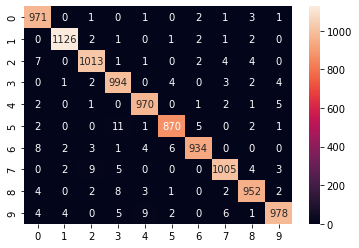

In [14]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='d')

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.0, 'Accuracy Evaluation')

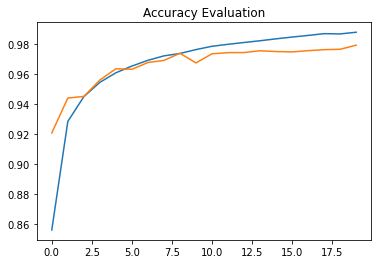

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Evaluation')

Text(0.5, 1.0, 'loss Evaluation')

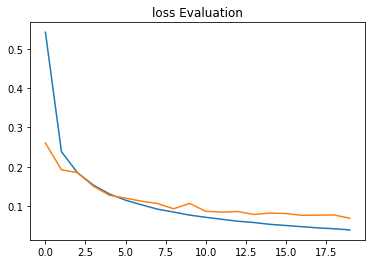

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss Evaluation')

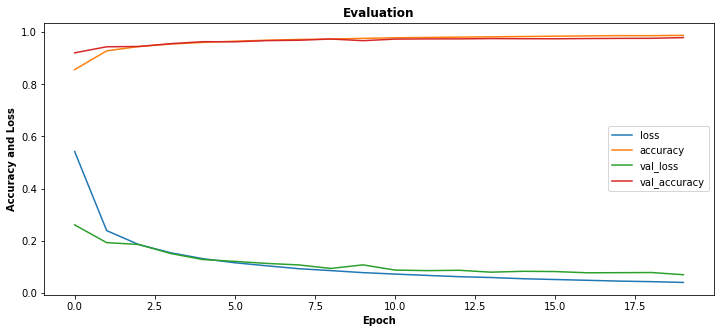

In [18]:
pd.DataFrame(history.history).plot(figsize=(12,5))
plt.title('Evaluation',fontweight='bold')
plt.xlabel('Epoch',fontweight='bold')
plt.ylabel('Accuracy and Loss',fontweight='bold')
plt.show()

### 2] Fashion_Mnist

In [19]:

(X_train, y_train), (X_test, y_test) =tf.keras.datasets.fashion_mnist.load_data() #split dataset into train and test
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### DATA SCALING

In [20]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [21]:
#scaled_value = (original_value – min) / (max – min)
X_train = (X_train - 0) / (255 - 0)
X_test = (X_test - 0) / (255 - 0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

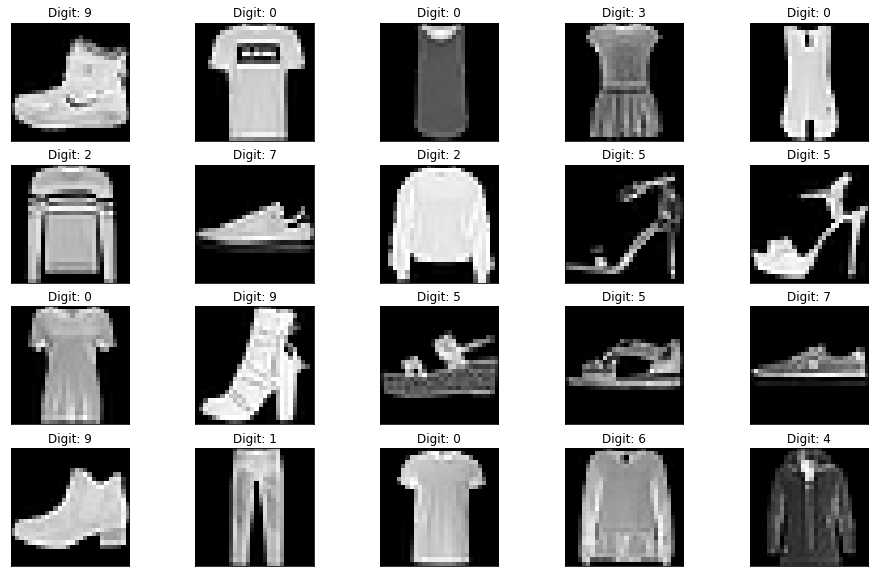

In [22]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

***There are ten categories to classify in the fashion_mnist dataset:***<br>
**1**--T-shirt/top 
**2**--Pullover
**3**--Dress
**4**--Coat
**5**--Sandal
**6**--Shirt
**7**--Sneaker
**8**--Bag
**9**--Ankle boot

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
#reshape() function to reshape all of the data by adding that extra dimension.
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
X_train.shape

(60000, 28, 28, 1)

In [25]:
#let's take a look at the format of our target values (y_train)
y_train[0:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

### Define Model2

In [26]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

### Compile 

In [27]:
model2.compile(
    optimizer='sgd', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

### Fit the model

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks2=[EarlyStopping(monitor='val_accuracy',patience=3)]
history2=model2.fit(X_train, y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=callbacks2)

Epoch 1/10
1500/1500 [==============================] - 47s 30ms/step - loss: 0.7488 - accuracy: 0.7393 - val_loss: 0.5498 - val_accuracy: 0.7880
Epoch 2/10
1500/1500 [==============================] - 41s 28ms/step - loss: 0.5126 - accuracy: 0.8161 - val_loss: 0.4676 - val_accuracy: 0.8336
Epoch 3/10
1500/1500 [==============================] - 40s 26ms/step - loss: 0.4580 - accuracy: 0.8364 - val_loss: 0.4323 - val_accuracy: 0.8485
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.4236 - accuracy: 0.8497 - val_loss: 0.4331 - val_accuracy: 0.8478
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3967 - accuracy: 0.8593 - val_loss: 0.3880 - val_accuracy: 0.8652
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3727 - accuracy: 0.8677 - val_loss: 0.3890 - val_accuracy: 0.8583
Epoch 7/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.3540 - accuracy: 0.8732 - val_loss: 0.3516 -

### Evaluation

In [29]:
predictions2 = np.argmax(model2.predict(X_test), axis=-1)
accuracy_score(y_test, predictions2)

313/313 [==============================] - 5s 14ms/step


0.8765

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, predictions2)
confusion_matrix

array([[801,   0,  15,  22,   3,   1, 151,   0,   7,   0],
       [  3, 961,   2,  25,   3,   0,   4,   0,   2,   0],
       [ 12,   1, 858,  14,  61,   1,  49,   0,   4,   0],
       [ 26,   6,   8, 893,  23,   0,  40,   0,   4,   0],
       [  0,   1, 129,  33, 763,   0,  71,   0,   3,   0],
       [  0,   0,   0,   2,   0, 934,   0,  42,   4,  18],
       [100,   0, 102,  26,  76,   0, 681,   0,  15,   0],
       [  0,   0,   0,   0,   0,  14,   0, 947,   0,  39],
       [  4,   1,   6,   8,   3,   1,   7,   6, 964,   0],
       [  0,   0,   0,   0,   0,   3,   0,  33,   1, 963]], dtype=int64)

<AxesSubplot:>

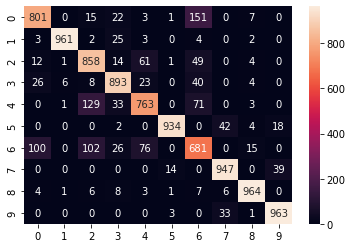

In [31]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [32]:
print(classification_report(y_test, predictions2))


              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.86      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.82      0.76      0.79      1000
           5       0.98      0.93      0.96      1000
           6       0.68      0.68      0.68      1000
           7       0.92      0.95      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Text(0.5, 1.0, 'Accuracy Evaluation')

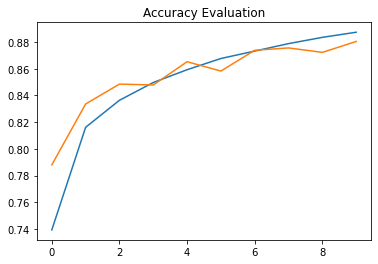

In [33]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy Evaluation')

Text(0.5, 1.0, 'loss Evaluation')

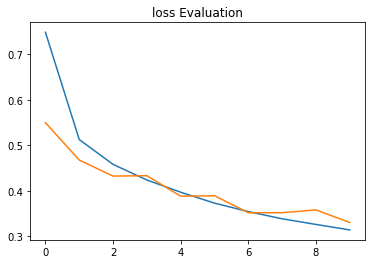

In [34]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss Evaluation')

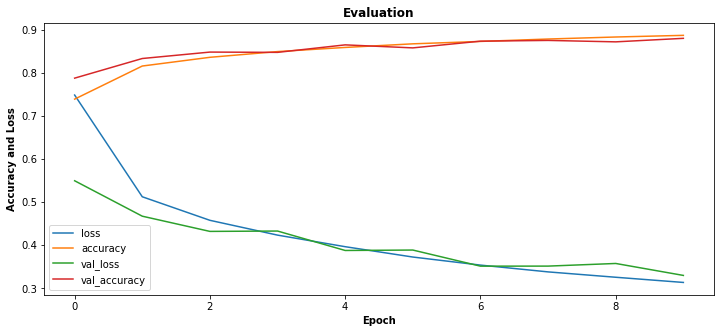

In [35]:
pd.DataFrame(history2.history).plot(figsize=(12,5))
plt.title('Evaluation',fontweight='bold')
plt.xlabel('Epoch',fontweight='bold')
plt.ylabel('Accuracy and Loss',fontweight='bold')
plt.show()

### 3] ASL (American Sign Language)


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# get our training and testing dataset
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [38]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [39]:
# get training the labels
labels = train['label'].values

In [40]:
# view the unique labels, 24 in target
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

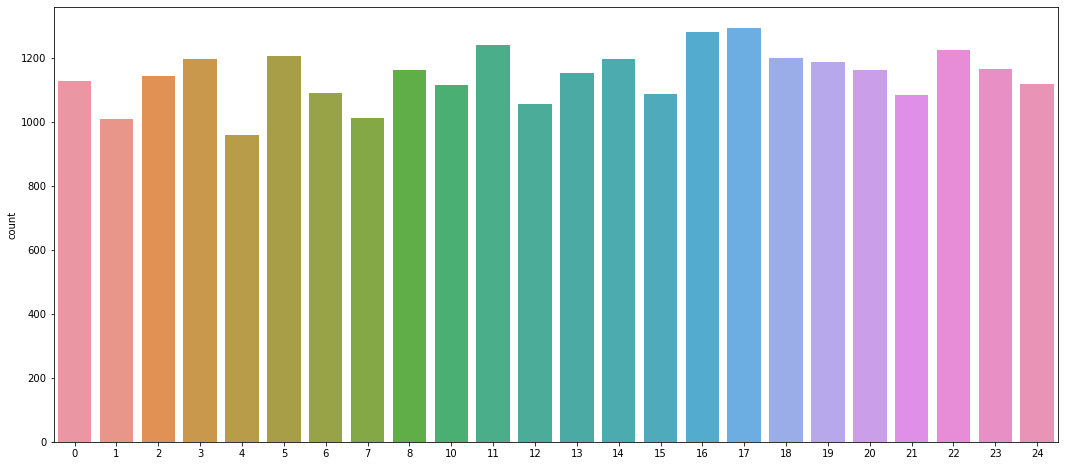

In [41]:
# plot the quantites in each class
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [42]:
# drop the training labels from our training data so we can seaperate it
train.drop('label',axis = 1, inplace=True)

In [43]:
# extract the image data from each row in our csv, remeber its is a row784 column
image = train.values
image = np.array([np.reshape(i,(28,28)) for i in image])
image = np.array([i.flatten() for i in image])

In [44]:
# labelencoder
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [45]:
# view our label
labels
#len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


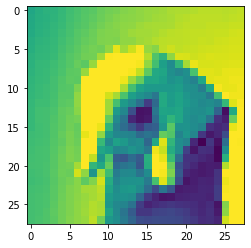

In [46]:
# inspect the image
index=5
print(labels[index])
plt.imshow(image[index].reshape(28,28))

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image, labels, test_size = 0.3, random_state=101)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size=128
num_classes=24
epochs=10


In [49]:
#scale images
x_train = x_train/255
x_test = x_test/255

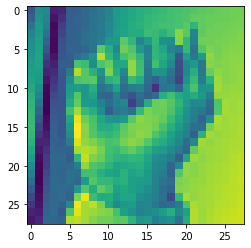

In [50]:
#reshape them into ize required by TF and Keras
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [51]:
# define the model
from tensorflow.keras import backend as k
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))


In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)        

In [53]:
# compile model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
# train the model
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
121/121 [==============================] - 35s 255ms/step - loss: 2.7177 - accuracy: 0.1747 - val_loss: 1.9007 - val_accuracy: 0.3923
Epoch 2/10
121/121 [==============================] - 26s 218ms/step - loss: 1.4142 - accuracy: 0.5328 - val_loss: 0.9790 - val_accuracy: 0.6777
Epoch 3/10
121/121 [==============================] - 29s 238ms/step - loss: 0.8524 - accuracy: 0.7124 - val_loss: 0.6753 - val_accuracy: 0.7846
Epoch 4/10
121/121 [==============================] - 26s 216ms/step - loss: 0.5753 - accuracy: 0.8099 - val_loss: 0.4829 - val_accuracy: 0.8481
Epoch 5/10
121/121 [==============================] - 29s 237ms/step - loss: 0.3926 - accuracy: 0.8694 - val_loss: 0.3169 - val_accuracy: 0.8970
Epoch 6/10
121/121 [==============================] - 27s 226ms/step - loss: 0.2781 - accuracy: 0.9087 - val_loss: 0.2283 - val_accuracy: 0.9279
Epoch 7/10
121/121 [==============================] - 26s 219ms/step - loss: 0.2048 - accuracy: 0.9365 - val_loss: 0.1776 - val_ac

In [55]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [56]:
print(f'accuracy: {accuracy*100}')

accuracy: 97.96042442321777


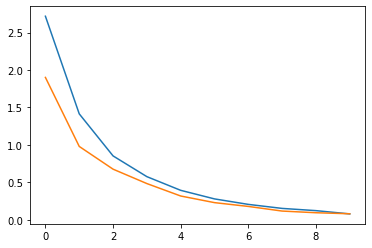

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

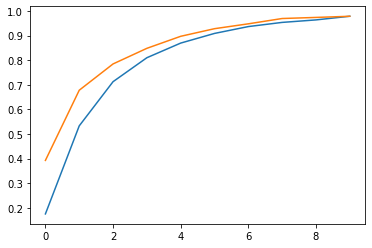

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [59]:
y_pred = model.predict(x_test)

258/258 [==============================] - 5s 18ms/step
